# Анализ бизнес показателей развлекательного приложения

<font size="4"><b>О проекте:</b></font>

Развлекательное приложение Procrastinate Pro+ вкладывает огромные средства в рекламу, однако в последние несколько месяцев компания терпит убытки.

***Цель:*** *найти причины убытков и помочь компании выйти в плюс.*

***Задачи:***
- изучить, откуда приходят пользователи и какими устройствами они пользуются;
- определить стоимость привлечения пользователей из различных рекламных каналов;
- найти, сколько денег приносит каждый клиент;
- узнать, когда расходы окупаются;
- проверить, что мешает успешному привлечению клиентов.

<font size="4"><b>Описание данных:</b></font>

В проекте используются данные о пользователях, привлеченных **с 1 мая по 27 октября 2019 года**.

Для исследования используются 3 датасета:
* `orders_info_short.csv` - информация о заказах
* `costs_info_short.csv` - информация о расходах на рекламу
* `visits_info_short.csv` - лог сервера с информацией о посещениях сайта



<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных" data-toc-modified-id="Импорт-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт данных</a></span></li><li><span><a href="#Общая-информация-о-датасетах" data-toc-modified-id="Общая-информация-о-датасетах-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Общая информация о датасетах</a></span><ul class="toc-item"><li><span><a href="#Датасет-costs" data-toc-modified-id="Датасет-costs-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Датасет <code>costs</code></a></span></li><li><span><a href="#Датасет-orders" data-toc-modified-id="Датасет-orders-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Датасет <code>orders</code></a></span></li><li><span><a href="#Датасет-visits" data-toc-modified-id="Датасет-visits-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Датасет <code>visits</code></a></span></li></ul></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Преобразование-типов" data-toc-modified-id="Преобразование-типов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Преобразование типов</a></span></li><li><span><a href="#Проверка-на-дубликаты-и-аномалии" data-toc-modified-id="Проверка-на-дубликаты-и-аномалии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка на дубликаты и аномалии</a></span></li></ul></li><li><span><a href="#Определение-используемых-функций" data-toc-modified-id="Определение-используемых-функций-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение используемых функций</a></span><ul class="toc-item"><li><span><a href="#Вычислительные-функции:" data-toc-modified-id="Вычислительные-функции:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><strong>Вычислительные функции:</strong></a></span><ul class="toc-item"><li><span><a href="#get_profiles()" data-toc-modified-id="get_profiles()-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span><code>get_profiles()</code></a></span></li><li><span><a href="#get_retention()" data-toc-modified-id="get_retention()-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span><code>get_retention()</code></a></span></li><li><span><a href="#get_conversion()" data-toc-modified-id="get_conversion()-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span><code>get_conversion()</code></a></span></li><li><span><a href="#get_ltv()" data-toc-modified-id="get_ltv()-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span><code>get_ltv()</code></a></span></li><li><span><a href="#ratio_payer()" data-toc-modified-id="ratio_payer()-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span><code>ratio_payer()</code></a></span></li></ul></li><li><span><a href="#Функции-для-визуализации-данных:" data-toc-modified-id="Функции-для-визуализации-данных:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><strong>Функции для визуализации данных:</strong></a></span><ul class="toc-item"><li><span><a href="#filter_data()" data-toc-modified-id="filter_data()-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span><code>filter_data()</code></a></span></li><li><span><a href="#plot_retention()" data-toc-modified-id="plot_retention()-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span><code>plot_retention()</code></a></span></li><li><span><a href="#plot_conversion()" data-toc-modified-id="plot_conversion()-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span><code>plot_conversion()</code></a></span></li><li><span><a href="#plot_ltv_roi()" data-toc-modified-id="plot_ltv_roi()-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span><code>plot_ltv_roi()</code></a></span></li><li><span><a href="#pl_barh()" data-toc-modified-id="pl_barh()-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span><code>pl_barh()</code></a></span></li><li><span><a href="#plot_costs_history()" data-toc-modified-id="plot_costs_history()-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span><code>plot_costs_history()</code></a></span></li><li><span><a href="#connection_to_region()" data-toc-modified-id="connection_to_region()-3.2.7"><span class="toc-item-num">3.2.7&nbsp;&nbsp;</span><code>connection_to_region()</code></a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Получение-профилей-пользователей" data-toc-modified-id="Получение-профилей-пользователей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Получение профилей пользователей</a></span></li><li><span><a href="#Регионы-пользователей" data-toc-modified-id="Регионы-пользователей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Регионы пользователей</a></span></li><li><span><a href="#Устройства-пользователей" data-toc-modified-id="Устройства-пользователей-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Устройства пользователей</a></span></li><li><span><a href="#Каналы-привлечения" data-toc-modified-id="Каналы-привлечения-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Каналы привлечения</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Расходы-на-рекламные-кампании" data-toc-modified-id="Расходы-на-рекламные-кампании-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Расходы на рекламные кампании</a></span><ul class="toc-item"><li><span><a href="#Количество-выделенных-средств-по-сервисам" data-toc-modified-id="Количество-выделенных-средств-по-сервисам-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Количество выделенных средств по сервисам</a></span></li><li><span><a href="#Динамика-затрат-на-кампании" data-toc-modified-id="Динамика-затрат-на-кампании-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Динамика затрат на кампании</a></span></li><li><span><a href="#Стоимость-привлечения-пользователя" data-toc-modified-id="Стоимость-привлечения-пользователя-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Стоимость привлечения пользователя</a></span></li></ul></li><li><span><a href="#Окупаемость-рекламы" data-toc-modified-id="Окупаемость-рекламы-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Окупаемость рекламы</a></span><ul class="toc-item"><li><span><a href="#LTV-и-ROI" data-toc-modified-id="LTV-и-ROI-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>LTV и ROI</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-странам-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по странам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-устройствам-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-каналам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-каналам-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по каналам</a></span></li></ul></li><li><span><a href="#Конверсия-пользователей" data-toc-modified-id="Конверсия-пользователей-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Конверсия пользователей</a></span></li><li><span><a href="#Удержание-пользователей" data-toc-modified-id="Удержание-пользователей-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Удержание пользователей</a></span></li><li><span><a href="#Поиск-связей-между-регионом-пользователя-и-устройством/каналом-привлечения" data-toc-modified-id="Поиск-связей-между-регионом-пользователя-и-устройством/каналом-привлечения-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Поиск связей между регионом пользователя и устройством/каналом привлечения</a></span><ul class="toc-item"><li><span><a href="#Устройство-пользователя-и-регион" data-toc-modified-id="Устройство-пользователя-и-регион-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Устройство пользователя и регион</a></span></li><li><span><a href="#Канал-привлечения-пользователя-и-регион" data-toc-modified-id="Канал-привлечения-пользователя-и-регион-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Канал привлечения пользователя и регион</a></span></li><li><span><a href="#Проверка-общих-показателей-компании-без-каналов-TipTop-и-FaceBoom" data-toc-modified-id="Проверка-общих-показателей-компании-без-каналов-TipTop-и-FaceBoom-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>Проверка общих показателей компании без каналов TipTop и FaceBoom</a></span></li></ul></li><li><span><a href="#Оценка-окупаемости" data-toc-modified-id="Оценка-окупаемости-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Оценка окупаемости</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Общая информация о данных

### Импорт данных

In [1]:
# импортируем все нужные библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
# выгрузим данные

try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    visits = pd.read_csv('/datasets/visits_info_short.csv')
except:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')

In [3]:
# добавим атрибут имени к датасетам
costs.name = 'costs'
orders.name = 'orders'
visits.name = 'visits'

In [4]:
# приведем названия столбцов к нужному стилю

for df in [costs, orders, visits]:
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')

### Общая информация о датасетах

In [5]:
# введём функцию, позволяющую вывести общую информацию о данных

def df_info(df, figsize=(7, 5)):
    print('Вид данных:')
    display(df.head(5))
    
    print()
    print('Общая информация о данных:')
    print()
    df.info()
    
    # проверяем, есть ли в датасете столбцы с числовыми данными, для которых можно построить
    # распределение (за исключением столбца с идентификаторами пользователей),
    # строим гистограмму, если такие столбцы есть
    if 'user_id' in df.columns:
        if len(df.drop(columns=['user_id']).select_dtypes(include=['int64', 'float64']).columns) != 0:
            print()
            print('Распределения числовых величин в данных:')
            df.drop(columns=['user_id']).hist(figsize=figsize, color='SteelBlue', grid=False, bins=60);
    else:
        if len(df.select_dtypes(include=['int64', 'float64']).columns) != 0:
            print()
            print('Распределения числовых величин в данных:')
            df.hist(figsize=figsize, color='SteelBlue', grid=False, bins=60);
            

#### Датасет `costs`

Вид данных:


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1



Общая информация о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

Распределения числовых величин в данных:


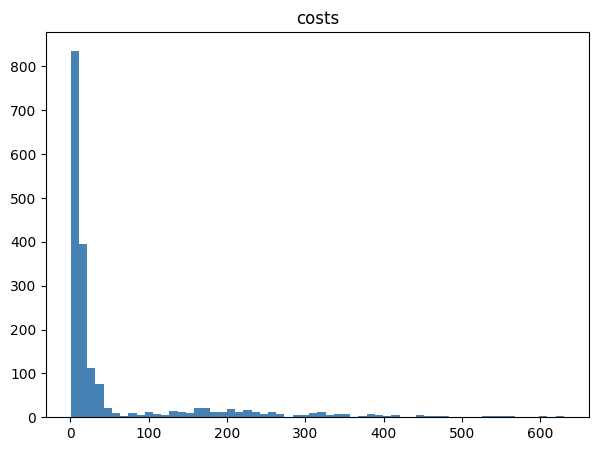

In [6]:
df_info(costs)

В таблице `costs` хранятся данные о проведенных рекламных кампаниях:
    
* в **`dt`** - дата проведенной кампании,
* в **`channel`** - рекламный источник,
* в **`costs`** - расходы на кампанию.

Стоимость рекламных кампаний варьируется от пары долларов до 600 долларов, распределение при этом не равномерно. Пропусков в данных нет.

#### Датасет `orders`

Вид данных:


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



Общая информация о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Распределения числовых величин в данных:


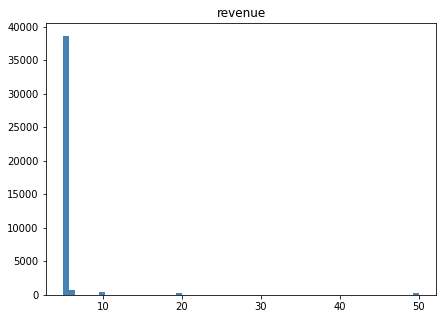

In [7]:
df_info(orders)

В таблице `orders` хранятся данные о заказах:
    
* в **`event_dt`** - дата и время заказа,
* в **`user_id`** - уникальный идентификатор пользователя, совершившего заказ,
* в **`revenue`** - сумма заказа.

В основном суммма заказов составляет примерно 5$. Пропусков в данных нет.

#### Датасет `visits`

In [8]:
df_info(visits)

Вид данных:


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



Общая информация о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице `visits` хранятся данные о посещениях сайта:
    
* в **`user_id`** - уникальный идентификатор пользователя, совершившего заказ,
* в **`region`** - регион пользователя,
* в **`device`** - тип устройства пользователя,
* в **`channel`** - источник перехода,
* в **`session_start`** - начало сессии,
* в **`session_end`** - конец сессии.

Пропусков в данных нет.

## Предобработка данных

### Преобразование типов

В датасетах все типы данных, кроме временны́х, соответствуют своим значениям.

In [7]:
# функция преобразования данных о времени

def to_datetime(df, cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col])

In [8]:
# преобразуем данные о времени

to_datetime(costs, ['dt'])
to_datetime(orders, ['event_dt'])
to_datetime(visits, ['session_start', 'session_end'])

In [9]:
# добавим столбцы в costs с указанием месяца и номера недели

costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week
costs['dt'] = costs['dt'].dt.date
costs.head(5)

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18


### Проверка на дубликаты и аномалии

In [12]:
# проверка на явные дубликаты

for df in [costs, orders, visits]:
    columns = df.columns
    print(f'Дубликатов в таблице {df.name}: {df[df.duplicated()][columns[0]].count()}')

Дубликатов в таблице costs: 0
Дубликатов в таблице orders: 0
Дубликатов в таблице visits: 0


Проверим данные на наличие аномальных значений.

* В таблице `orders` стоимость заказа не может быть равной нулю
* В таблице `costs` стоимость рекламной кампании не может быть равной нулю

In [13]:
print('Минимальная сумма заказа:', orders['revenue'].min())
print('Минимальная плата за рекламную кампанию:', costs['costs'].min())

Минимальная сумма заказа: 4.99
Минимальная плата за рекламную кампанию: 0.8


Аномальных значений в датасетах нет.

## Определение используемых функций

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Дополнительные аналитические функции:

- `ratio_payer()` - для подсчёта доли платящих пользователей внутри какой-либо категории

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi()` — для визуализации LTV и ROI.
- `pl_barh()` - для построения графиков-рейтингов
- `plot_costs_history()` - для построения динамики разатрат на рекламные кампании во времени
- `connection_to_region()` - для построения связи между регионом пользователей и какой-либо другой характеристики

### **Вычислительные функции:**

#### `get_profiles()`

In [11]:
# функция для создания профилей пользователей

def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(
        0
    )
    
    return profiles  # возвращаем профили с CAC

#### `get_retention()`

In [12]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### `get_conversion()`

In [13]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### `get_ltv()`

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### `ratio_payer()`

In [15]:
# создадим функцию для подсчета доли платящих пользователей внутри какой-либо категории

def ratio_payer(df, col, rename=True):
    result = (
        df
        .pivot_table(index=col, values='payer', aggfunc=['count', 'sum', 'mean'])
    )
    result.columns = ['all_users', 'payers', 'ratio']
    result['ratio'] = round(result['ratio'], 3)
    result = result.sort_values(by=['ratio'], ascending=False)
    
    if rename == True:
        result.columns = ['Всего пользователей', 'Количество платящих пользователей', 'Доля платящих пользователей']
    
    return result

### **Функции для визуализации данных:**

#### `filter_data()`

In [16]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### `plot_retention()`

In [17]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### `plot_conversion()`

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### `plot_ltv_roi()`

In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### `pl_barh()`

In [31]:
# создадим функцию для графиков-рейтингов

def pl_barh(data, col, title, cond=0, r='down', figsize = (10,4), agg='count', values='name', top=False):
    
    # настройка сортировки
    if r == 'down':
        r = True
    else:
        r = False
        
    # если условие не задано, то условием будет выбор всех строк
    try:
        if cond == 0:
            cond = [True for i in data.index]
    except:
        cond=cond
        
    if top == False:
        (
            data.loc[cond]
            .groupby(col)[values]
            .agg(agg)
            .sort_values(ascending=r)
            .plot(kind = 'barh', figsize = figsize, legend = False, fontsize = 12, color = 'SteelBlue')
            .set_title(title + '\n', fontsize = 14, color = 'Black')
        )
    else:
        data = (
            data.loc[cond]
            .groupby(col)[values]
            .agg(agg)
            .sort_values(ascending=r)
        )
        (
            data
            .tail(5)
            .plot(kind='barh', figsize = figsize, legend = False, fontsize = 12, color = 'SteelBlue')
            .set_title(title + '\n', fontsize = 18, color = 'Black')
        )

#### `plot_costs_history()`

In [21]:
# функция для построения графика затрат рекламных кампаний

def plot_costs_history(costs):
    
    # выделим изменение по месяцам 
    c_months = (
        costs
        .pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
    )
    
    # выделим изменения по неделям
    c_weeks = (
        costs
        .pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
    )
    
    # строим набор графиков
    # сначала общую картину: слева по месяцам, справа - по неделям
    plt.figure(figsize=(20, 30))
    
    ax1 = plt.subplot(6, 2, 1)
    c_months.plot(ax=ax1)
    
    plt.ylabel('Расходы')
    plt.title('Общий график по месяцам')
    
    
    ax2 = plt.subplot(6, 2, 2)
    c_weeks.plot(ax=ax2, sharey=ax1)
    plt.ylabel('Расходы')
    plt.title('Общий график по неделям')
    
    # рисуем остальные по двое
    columns = (costs
               .groupby(['channel', 'week'])['costs']
               .agg('mean')
               .groupby('channel')
               .agg('mean')
               .sort_values(ascending=False)
               .index
              ) 
    
    i = 3
    cols = [0, 1]
    for k in range(len(columns)//2):
        ax5 = plt.subplot(6, 2, i)
        c_months[columns[cols]].plot(ax=ax5)
        i += 1
        
        ax6 = plt.subplot(6, 2, i)
        c_weeks[columns[cols]].plot(ax=ax6)
        i += 1
        
        cols[0] += 2
        cols[1] += 2
    
    plt.tight_layout()
    plt.show()

#### `connection_to_region()`

In [22]:
def connection_to_region(profiles, col, group='group'):
    
    # сводная таблица, соединяющая интересующую нас категорию и регион
    t = (
        profiles
        .pivot_table(index=col, columns='region', values='user_id', aggfunc='count' )
    )
    
    # найдём, сколько пользователей состоит в категории
    t['total_users'] = t.sum(axis=1)
    total_users = t['total_users']
    
    # найлём долю пользователей категории на каждый регион
    t = t.div(total_users, axis=0)
    t[t.columns[0:4]] = round(t[t.columns[0:4]], 2) # округлим полученное значение
    
    # вернём столбец количества пользователей внутри категории
    t['total_users'] = total_users
    t = t.fillna(0)
    
    # выведем таблицу на экран
    display(t)
    
    
    # построим график для более наглядной визуализации полученных данных
    
    # ширина колонки
    barWidth = 0.25
 
    # задаём позиции вдоль оси ОХ на графике для каждой категории
    r = np.arange(len(t[t.columns[0]]))
    r = [2*x for x in r]
    colors = ['salmon', 'plum', 'sandybrown', 'steelblue']
    columns = t.columns # сохраним список регионов в отдельной переменной

    # строим график
    plt.figure(figsize=(10, 5))
    for i in range(len(columns) - 1):
        plt.bar(r, t[[columns[i]]].reset_index()[columns[i]], color=colors[i], width=barWidth, edgecolor='white', label=columns[i])
        r = [x + barWidth for x in r]

    # добавим названия категорий на ось абсцисс
    plt.xlabel(group, fontweight='bold')
    plt.xticks([i - 3 * barWidth for i in r], t.index)
    
    # добавим легенду и выведем график на экран
    plt.legend()
    plt.show()

## Исследовательский анализ данных

### Получение профилей пользователей

In [23]:
# получаем профили пользователей

profiles = get_profiles(visits, orders, costs[['dt', 'channel', 'costs']])
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [24]:
print('Минимальная дата привлечения пользователей:', profiles['first_ts'].dt.date.min())
print('Максимальная дата привлечения пользователей:', profiles['first_ts'].dt.date.max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


В данных присутствует информация о пользователях, привлеченных с 1 мая по 27 октября 2019 года.

### Регионы пользователей

In [25]:
# получим список стран, из которых в приложение приходят пользователи
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

Приложением пользуются в 4-х странах: в США, Великобритании, Франции и Германии.

In [26]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


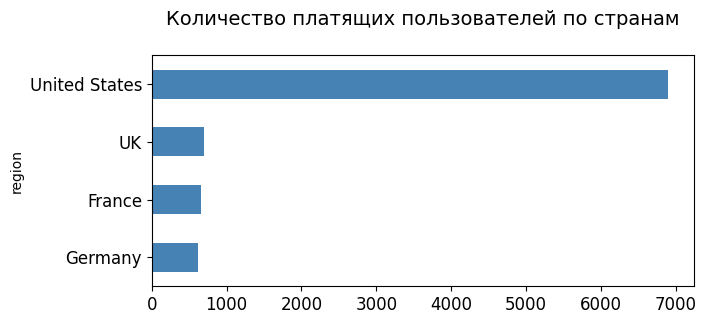

In [32]:
pl_barh(profiles, 'region', 
        'Количество платящих пользователей по странам', 
        profiles['payer'] == True, values='user_id', figsize=(7, 3))

Подавляющее большинство платящих пользователей впервые заходили в приложение в США.

In [33]:
ratio_payer(profiles, 'region')

,Всего пользователей,Количество платящих пользователей,Доля платящих пользователей
region,,,
United States,100002,6902,0.069
Germany,14981,616,0.041
UK,17575,700,0.040
France,17450,663,0.038


Большая часть пользователей приложения из США. При этом практически 7% из них совершают хотя бы один заказ, что в 1,75 раз больше, чем в других странах.

### Устройства пользователей

In [34]:
# получим список устройств, с которых пользователи впервые использовали приложение
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

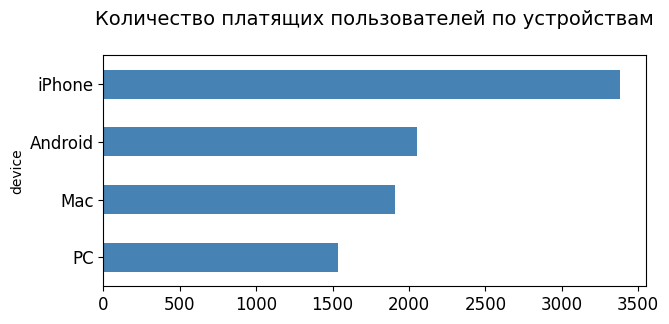

In [36]:
pl_barh(profiles, 'device', 
        'Количество платящих пользователей по устройствам', 
        profiles['payer'] == True, values='user_id', figsize=(7, 3))

Среди платящих пользователей больше всего тех, кто владеет iPhone. В целом для платящих пользователей более характерны именно мобильные устройства.

In [37]:
ratio_payer(profiles, 'device')

,Всего пользователей,Количество платящих пользователей,Доля платящих пользователей
device,,,
Mac,30042,1912,0.064
iPhone,54479,3382,0.062
Android,35032,2050,0.059
PC,30455,1537,0.050


Наибольшая конверсия для пользователей Mac, однако сильной разницы между долей платящих пользователей и устройством не прослеживается. Больше всего пользователей приложения заходили через iPhone.

### Каналы привлечения

In [38]:
profiles['channel'].unique()

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Всего используется 10 каналов привлечения.

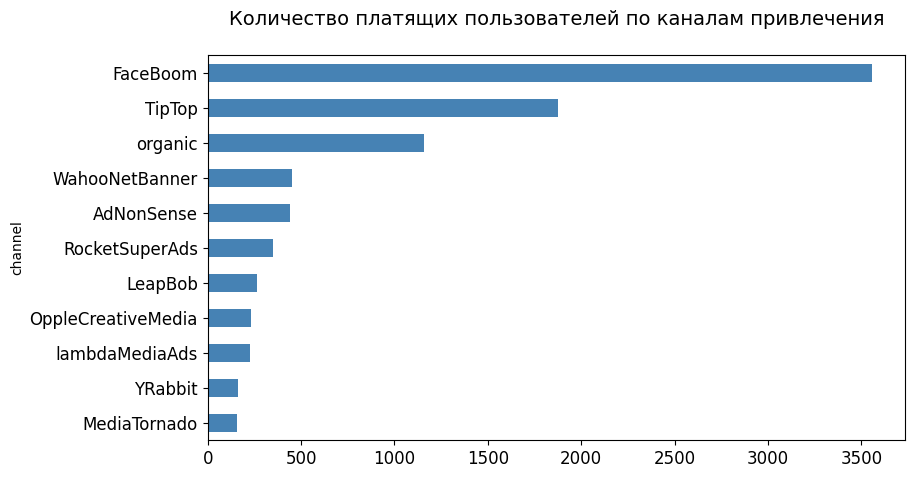

In [45]:
pl_barh(profiles, 'channel', 
        'Количество платящих пользователей по каналам привлечения', 
        profiles['payer'] == True, values='user_id', figsize=(9, 5))

1. Больше всего платящих пользователей привлечены каналом **FaceBoom** - около 3500
2. Столько же платящих пользователей совместно пришли **органически** и через **TipTop**
3. Оставшиеся каналы принесли не более 500 платящих пользователей каждый.

In [46]:
ratio_payer(profiles, 'channel')

,Всего пользователей,Количество платящих пользователей,Доля платящих пользователей
channel,,,
FaceBoom,29144,3557,0.122
AdNonSense,3880,440,0.113
lambdaMediaAds,2149,225,0.105
TipTop,19561,1878,0.096
RocketSuperAds,4448,352,0.079
WahooNetBanner,8553,453,0.053
YRabbit,4312,165,0.038
MediaTornado,4364,156,0.036
LeapBob,8553,262,0.031


1. **FaceBoom** сохраняет своё лидерство и по доле привлеченных платящих пользователей. 
2. Вторую и третюю позицию занимают каналы, с которых пришло меньше всего (по абсолютному значению) пользователей - **AdNonSense** (11%) и **lambdaMediaAds** (10%), следом за ними - **TipTop** (9%).
3. Больше всего пользователей - более 56 0000 - пришло органически, однако эти пользователи обладают наиболее низкой конверсией: чуть больше 2%.

Не смотря на то, что по абсолютному количеству привлеченных пользователей каналы AdNonSense и WahooNetBanner практически равнозначны, первый значительно выигрывает по конверсии пользователей в платящие (11% и 5% соответственно).

**О пользователях:**

* Большая часть пользователей, привлеченных с 1 мая по 27 октября 2019 года, заходили в приложение с **США**. *Наиболее популярное устройство* - **iPhone**, оно же наиболее популярно и среди платящих пользователей. 

* В основном новые пользователи появляются **органическим путём** (почти 37% приходится именно на этот канал), однако из них только 1000 пользователей совершила хотя бы один заказ, поэтому такие пользователи обладают *самой низкой конверсией*: 3%.

* *Охотнее всего совершают покупки пользователи США*: конверсия составляет почти **7%**, тогда как конверсия остальных регионов - около 4%. Критичного влияния устройства на вероятность совершения покупки на данном этапе не обнаруживается, однако лучшей конверсией обладают пользователи Mac, худшей - РС.

* **FaceBoom** принес приложению больше всего платящих пользователей, этот канал обладает также лучшей конверсией: 12%.

* Есть каналы (**AdNonSense** и **lambdaMediaAds**), обладающие довольно высокой конверсией (11% и 10% соответственно), но по какой-то причине привлекающие крайне мало новых пользователей по абсолютному значению (около 5000 совместно).

## Маркетинг

### Расходы на рекламные кампании

In [48]:
print('Общие расходы на маркетинг:', round(costs['costs'].sum()))

Общие расходы на маркетинг: 105497


#### Количество выделенных средств по сервисам

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
costs,3911.25,32445.6,1797.6,954.48,2151.25,1833.0,54751.3,5151.0,944.22,1557.6


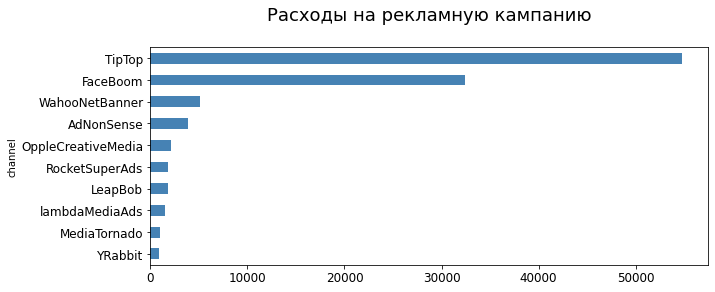

In [39]:
# посмотрим, сколько в целом было выделено средств на рекламные кампании определенных сервисов

# выведем таблицу
display(
    costs
    .pivot_table(index='channel', values='costs', aggfunc='sum')
    .T
)

# для большей наглядности построим график
pl_barh(costs, 'channel', 'Расходы на рекламную кампанию', agg='sum', values='costs')

Больше всего денег было выделено на рекламные кампании в TipTop и FaceBoom, эти же сервисы являются лидерами по количеству привлеченных платящих пользователей. При этом довольно мало денег выделено на AdNonSense и lamdaMediaAds, которые дают высокую конверсию пользователей. Вероятно, по этой же причине эти сервисы сильно проигрывают в количестве привлеченных платящих пользователей.

***Вероятно, стоит рассмотреть возможность выделения бóльших средств на рекламные кампании именно в каналах AdNonSense и lamdaMediaAds.***

#### Динамика затрат на кампании

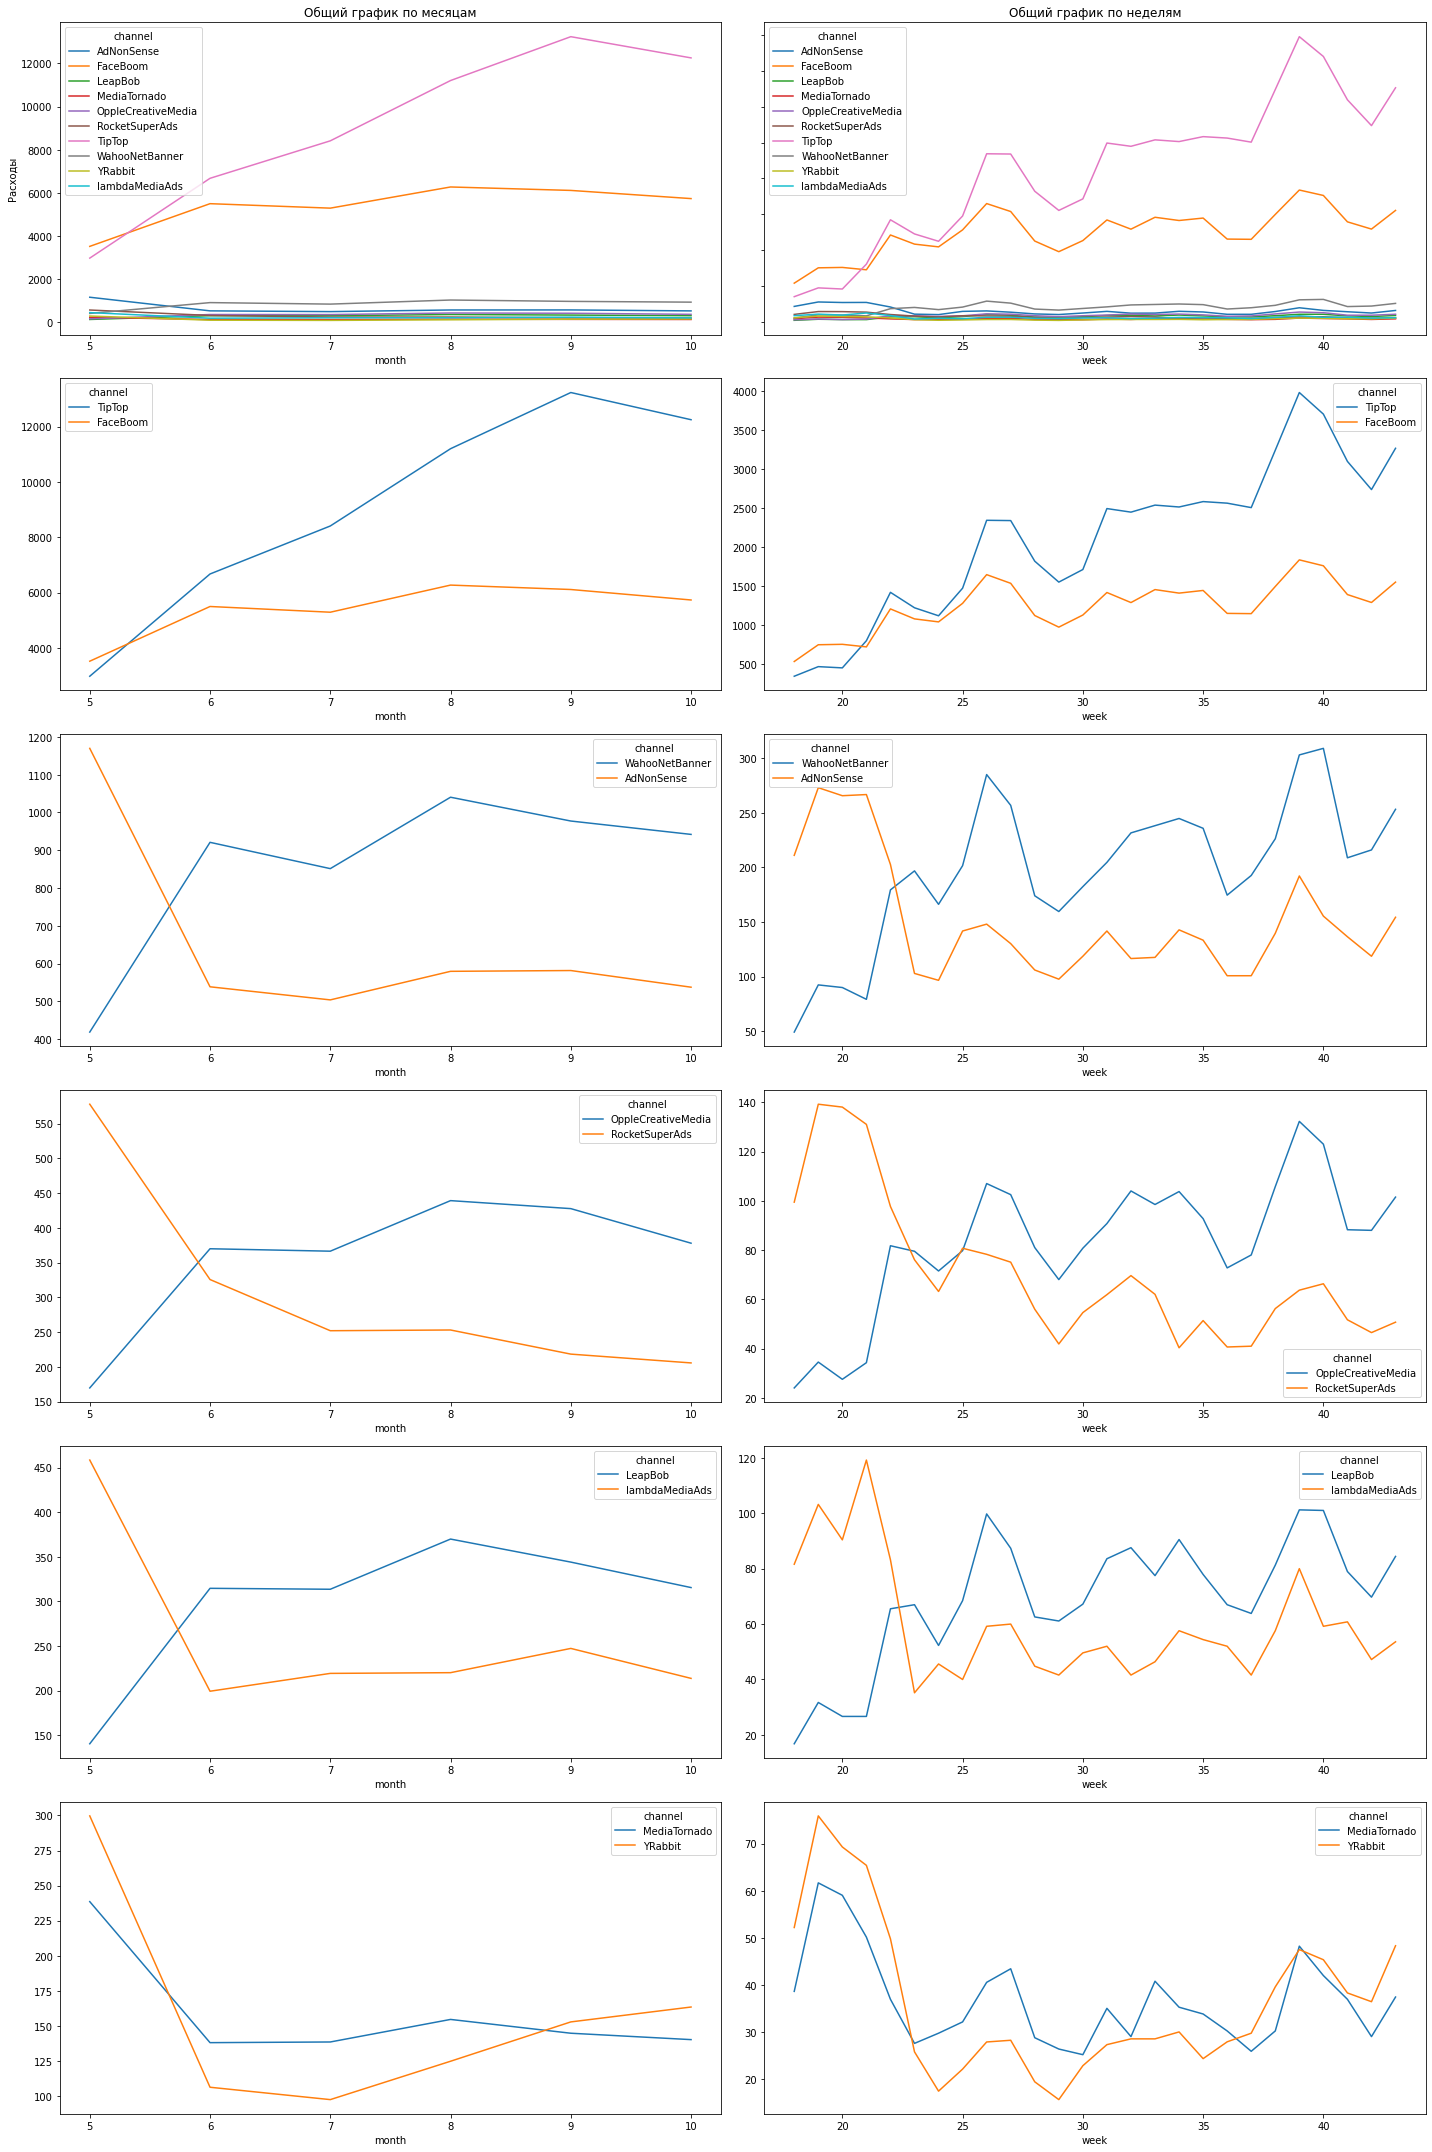

In [40]:
# посмотрим динамику затрат на рекламные кампании
plot_costs_history(costs)

Затраты на рекламные кампании в сервисах TipTop и FaceBoom стабильно растут. При этом Значительно быстрее наращиваются затраты на кампании канала TipTop, который приносит меньше платящих пользователей (как в абсолютном значении, так и по конверсии), чем FaceBoom.

В остальных каналах начиная с июля затраты в целом не меняются. Для динамики в период с мая по июль можно выделить 2 группы:
1. Резкое падение финансирования каналов вплоть до 50%: AdNonSense, RocketSuperAds, lamdaMediaAds, MediaTornado, YRabbit;
2. Резкий рост финансирования каналов вплоть до 50%: WahooNetBanner, OppleCreativeMedia, LeapBob.

#### Стоимость привлечения пользователя

In [51]:
# узнаем среднюю стоимость привлечения пользователя
print('Средняя стоимость привлечения пользователя:',
     profiles.loc[profiles['channel'] != 'organic', 'acquisition_cost'].mean().round(2))
print('Средняя стоимость привлечения пользователя внутри разных рекламных каналов:')
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)

Средняя стоимость привлечения пользователя: 1.13
Средняя стоимость привлечения пользователя внутри разных рекламных каналов:


channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

* Предсказуемо, *самыми дорогими пользователями* являются те, что пришли через **канал TipTop** - 2,8. Это в 2,5 раза больше средней стоимости привлечения пользователя. 
* Далее идут каналы с наибольшей конверсией: **FaceBoom** (1,1), **AdNonSense** (1,0) и **lambdaMediaAds** (0,7).
* Средняя стоимость пользователя канала **WahooNetBanner** - 0,6, при этом конверсия - около 5%.
* Можно обратить внимание также на канал **RocketSuperAds**, со средней стоимостью привлечения пользователя 0,41, а конверсией - почти 8%.
* Пользователи, привлеченные по остальным каналам в среднем обходятся дешевле 0,3, но обладают и относительно низкой конверсией: 3-4%.

**Таким образом,**
* Больше всего денег за рассматриваемый период ушло на канал **TipTop ( >50 000 )**, на втором месте - **FaceBoom ( ~30 000 )**, *на каждый из остальных каналов было выделено менее 5 0000*.
* Затраты на каналы TipTop и FaceBoom постепенно росли в течение рассматриваемого периода. Количество выделяемых средств в остальных каналах претерпевало сильные изменения с мая по июль, после чего изменяется слабо.
* *Самая дорогая средняя стоимость* привлечения пользователя у **TipTop** - 2,8. При этом этот канал не является лидером по конверсии (9,6%).

***Исходя из полученных данных, можно предположить, что средства на рекламу расходуются не оптимально.***
1. Большое количество денег выделяется на канал TopTop с самыми дорогими пользователями, при этом конверсия этих пользователей не самая высокая.
2. Цена привлечения через канал FaceBoom - 1,11, затрат на этот канал выделяется также достаточно (>30 000), затраты постоянно растут, однако это кажется оправданным, так как канал даёт пользователей с самой высокой конверсией - 12%. Похожими параметрами цены пользователя и конверсии обладают каналы AdNonSense и lamdaMediaAds. Однако за весь период на кампании в этих каналах было выделено в разы меньше средств (менее 10 000 совместно) и количество выделяемых средств со временем не растёт.
3. Стоит обратить внимание на каналы WahooNetBanner и RocketSuperAds (средняя стоимость пользователя: 0,6 и 0,41 соответственно; конверсия: 5% и 8% соответственно) и, возможно, пересмотреть количество выделяемых средств на кампании этих каналов.

***Эти предположения необходимо проверить в ходе оценки окупаемости рекламы.***

### Окупаемость рекламы

In [42]:
# так как нас интересуют маркетинговые показатели, 
# исключим из рассмотрения пользователей, пришедших на сайт самостоятельно
profiles = profiles[profiles['channel'] != 'organic']

In [43]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

#### LTV и ROI

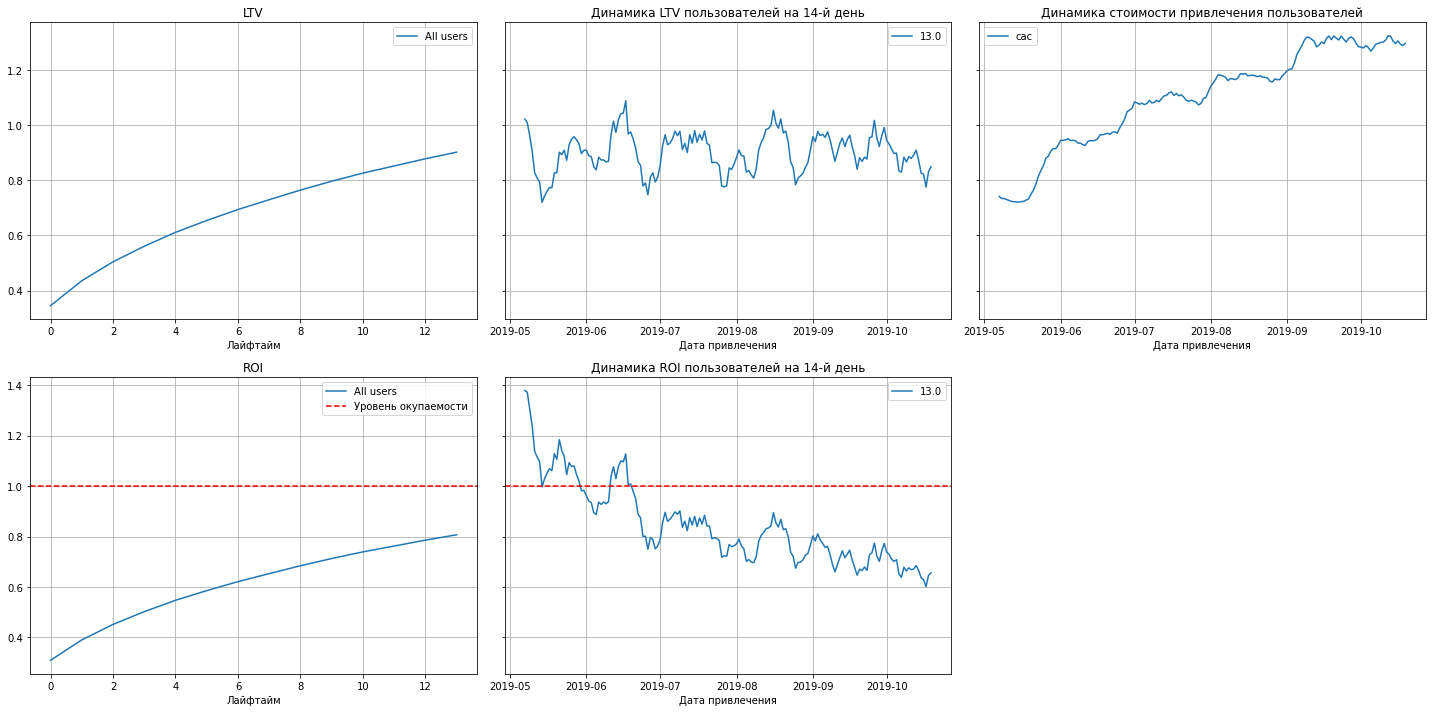

In [44]:
# рассмотрим ситуацию в целом

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

* **Реклама почти не окупается**. На конец второй недели ROI составляет 80%.
* Из динамики ROI видно, что **реклама окупалась *до июня***, после чего окупаемость стабильно падала. 
* **Качество пользователей со временем не меняется:** LTV стабилен и в среднем равен 0,9.
* **Стоимость привлечения пользователей в течение всего рассматриваемого периода растёт**. Отсутсвие окупаемости связано, видимо, именно со стоимостью привлечения пользователей.

Изучим эти показатели в зависимости от имеющихся характеристик пользователей.

#### Окупаемость рекламы с разбивкой по странам

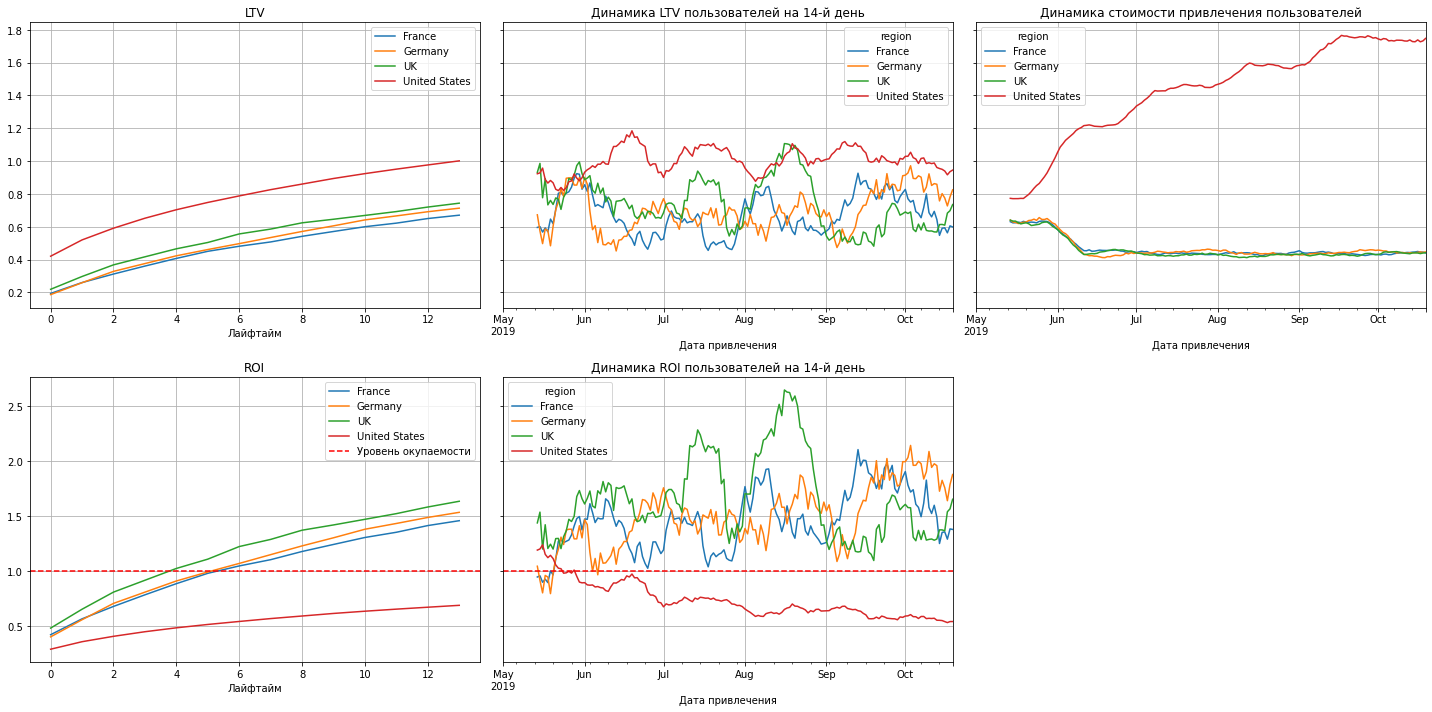

In [45]:
# смотрим окупаемость с разбивкой по странам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Из общей картины по всем параметрам выделяются пользователи США.**

* LTV США в среднем стабильно выше, чем у других стран.
* Стоимость привлечения пользователей резко выросла в США, и в целом САС пользователей США намного выше остальных. При этом в остальных странах САС в июне упал, а далее был стабилен.
* **Затраты на рекламу у всех стран, кроме США окупаются ещё на 5-й день. *Реклама в США не окупается за 2 недели.***
* В динамике ROI всех стран, кроме США, в целом стабильно и на конец рассматриваемого периода - около 150%. Окупаемость рекламы в США постепенно снижается, с июня становится менее 100% и продолжает постепенно снижаться. К моменту анализа окупаемость не превышает 60%.

***Итак, проблема связана именно с пользователями США.***

#### Окупаемость рекламы с разбивкой по устройствам

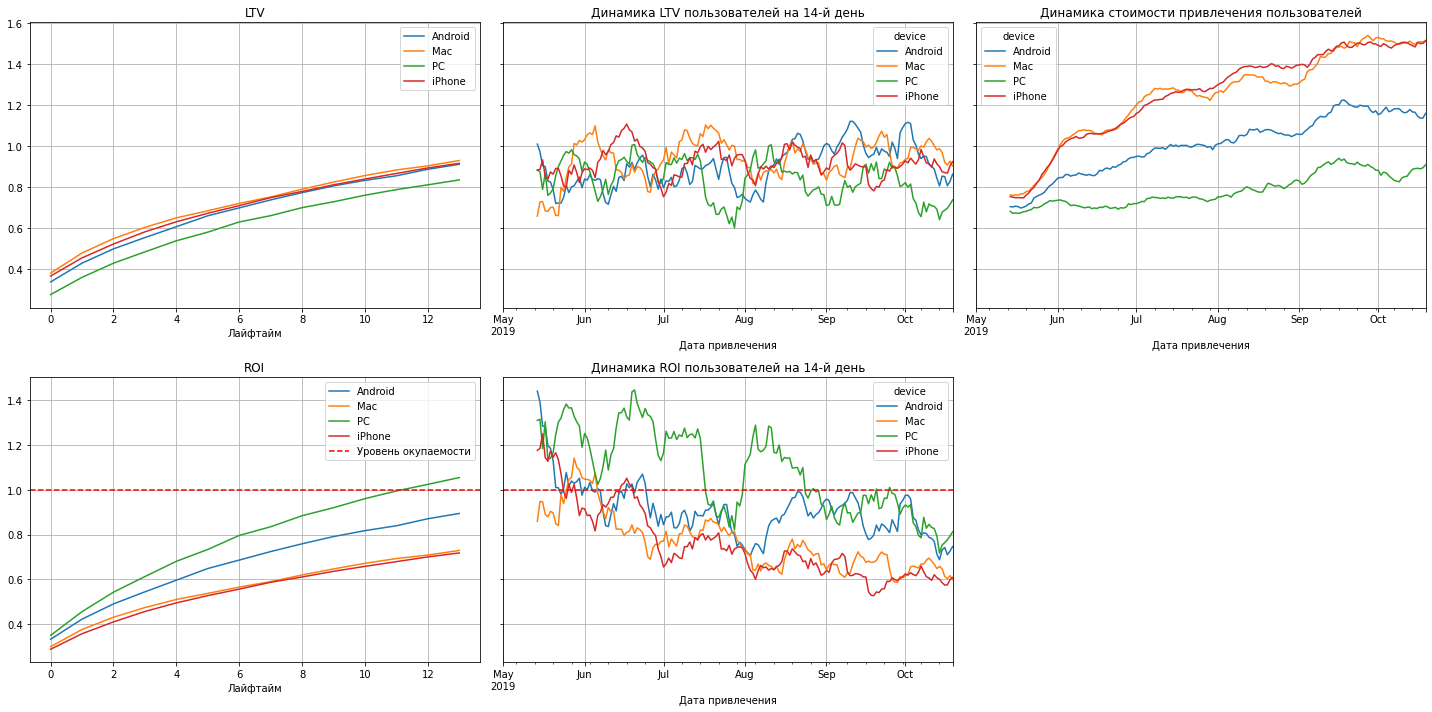

In [46]:
# смотрим окупаемость с разбивкой по устройствам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14     # усредним данные за 2 недели
)

* Качество пользователей разных устройств стабильно
* Значимых различий между пользователями Mac и IPhone в контексте окупаемости рекламы не наблюдается.
* В среднем, окупаются только пользователи РС. Хуже всего дела обстоят с **пользователями Apple: ROI на конец второй недели составляет менее 80%.**
* В июне стоимость привлечения пользователя скачком выросла для всех пользователей. **Наиболее высокая стоимость у пользователей Apple.** Следом идут Android и PC. С июля CAC продолжает медленно расти для всех пользователей.
* **За рассматриваемый период ROI всех пользователей постепенно снижается:** в мае реклама не окупалась только для пользователей Mac, тогда как к ноябрю ROI PC и Android - около 80%, у пользователей Apple - около 60%.

Качество пользователей Apple, Android и PC одинаковое, в то время как затраты на рекламу намного выше для первых, что объясняет отсутствие окупаемости рекламы в среднем для этих пользователей за весь рассматриваемый период.

***Пробемы касаются пользователей всех устройств, для пользователей Apple они наиболее выражены.***

#### Окупаемость рекламы с разбивкой по каналам

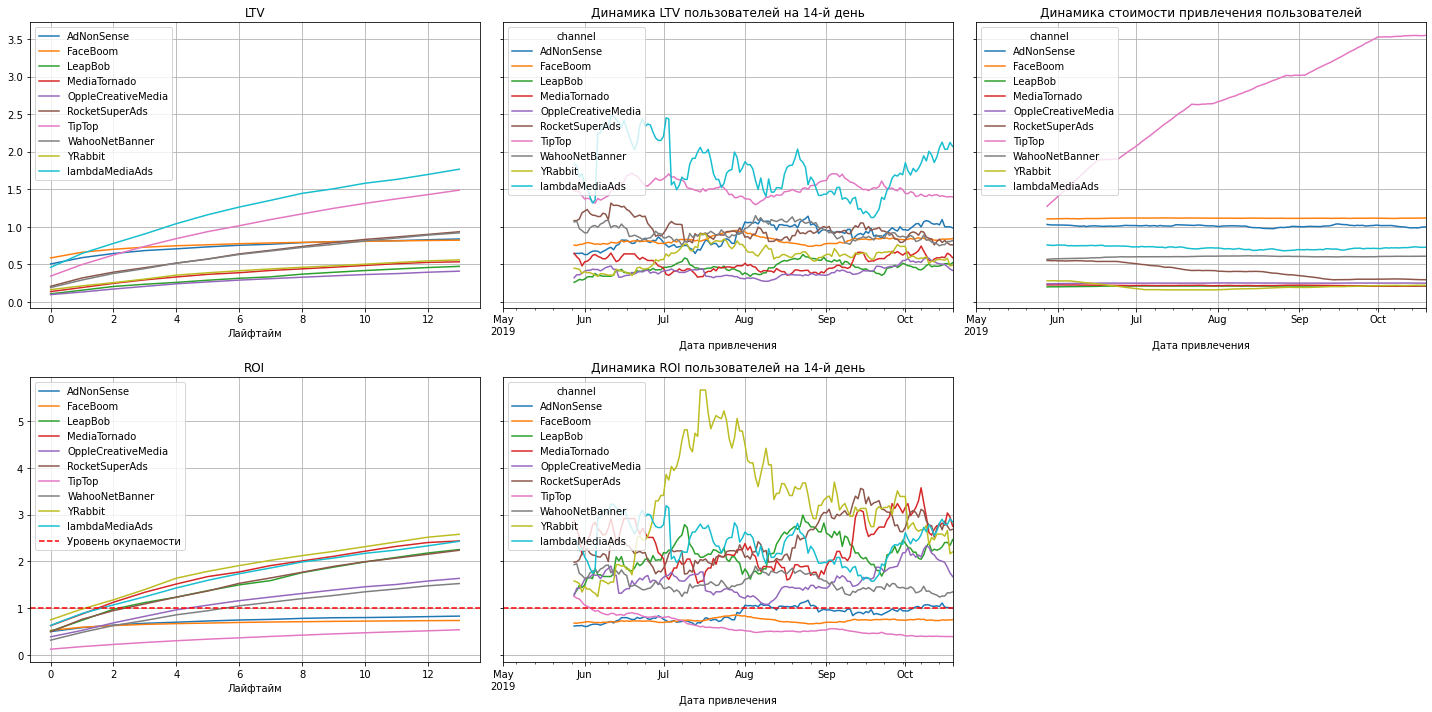

In [47]:
# смотрим окупаемость с разбивкой по каналам привлечения

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=28    # возьмем среднее за месяц (за 4 недели)
)

* Качество пользователей в целом стабильно для каждых каналов. Немного выделяется lamdaMediaAds несколько хаотичными колебаниями, однако это объясняется тем, что с этого канала было привлечено меньше всего пользователей за весь период - около 2100. Маленькие выборки более всего подтвержены сильным колебаниям.
* **Наиболее высокое LTV за 2 недели у пользователей, привлеченных каналами lamdaMediaAds и TipTop.** Во второй группе - AdNonSense, FaceBoom, WahooNetBanner.
* Стоимость привлечения пользователей стабильна для большинства каналов, за исключением канала **TipTop - стоимость этого канала изначально была самой высокой и продолжает быстро расти**, превышая на момент анализа значение 3,5. Заметно также постепенное снижение стоимости привлечения через канал RocketSuperAds в 2 раза. Интересно небольшое снижение стоиомсти в канале YRabit в июле с возвращением к прежнему значению к сентябрю.
* ROI большинства каналов к концу 2-й недели значительно выше 100%. **Исключения - AdNonSense, TipTop, FaceBoom - в этих каналах реклама не окупается.**
* ROI большинства каналов слабо меняется со временем. Выделяются два канала: YRabbit и RocketSuperAds, однако причины изменений окупаемости связаны с изменениями затрат на привлечение пользователей, описанными выше. **Реклама через канал FaceBoom стабильно не окупалась за весь рассматриваемый период. ROI TipTop было больше 100% до июля,** но с ростом затрат на привлечения пользователя в этом канале ROI постепенно снижался и на момент анализа составлял около 50%. ROI AdNonSense вышел на 100% в августе, но дальнейшего роста не было.

*Отсутствие окупаемости канала TipTop связано с сильным продожающимся ростом стоимости привлечения пользователей при отсутствии улучшения их качества. Кроме того, много затрат уходит на канал FaceBoom, рекламные кампании которого за весь рассматриваемый период никогда не окупались. Второй канал с убыточными рекламными кампаиями - AdNonSense - требует отдельного внимания.*

### Конверсия пользователей

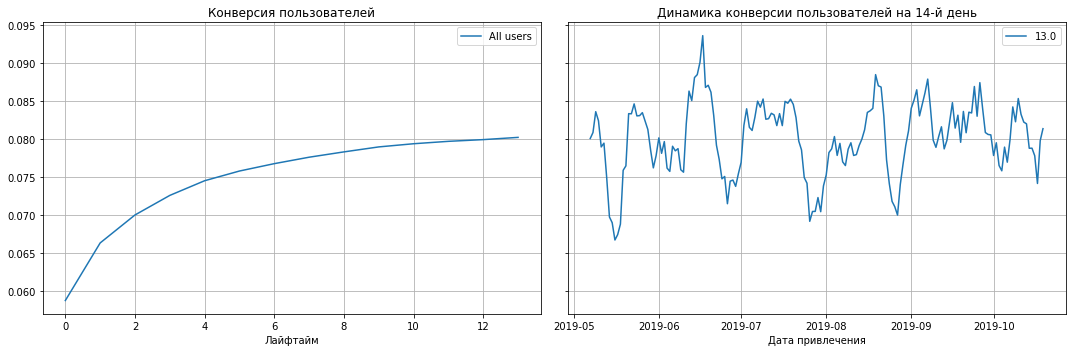

In [60]:
# изучим общую конверсию и удержание пользователей

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Общая конверсия около 8%. За рассматриваемый период конверсия колеблется у этого значения без тенденций к росту или сижению.

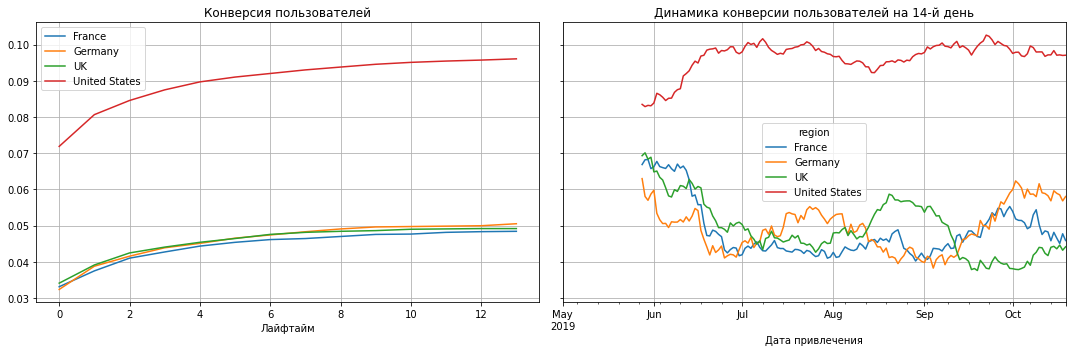

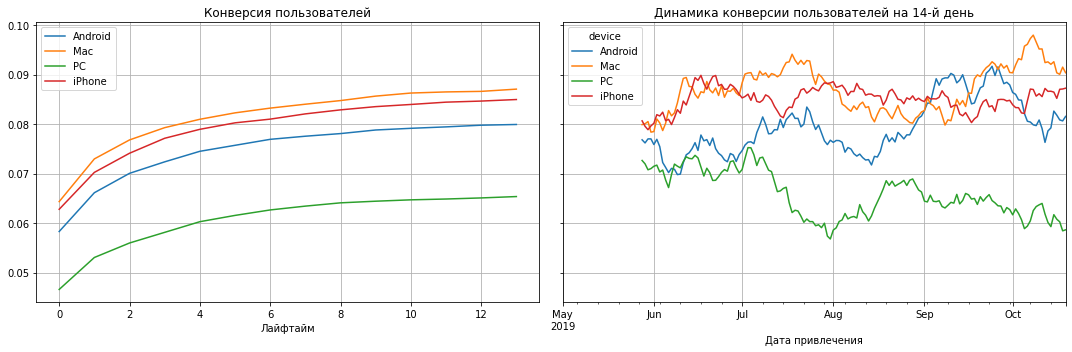

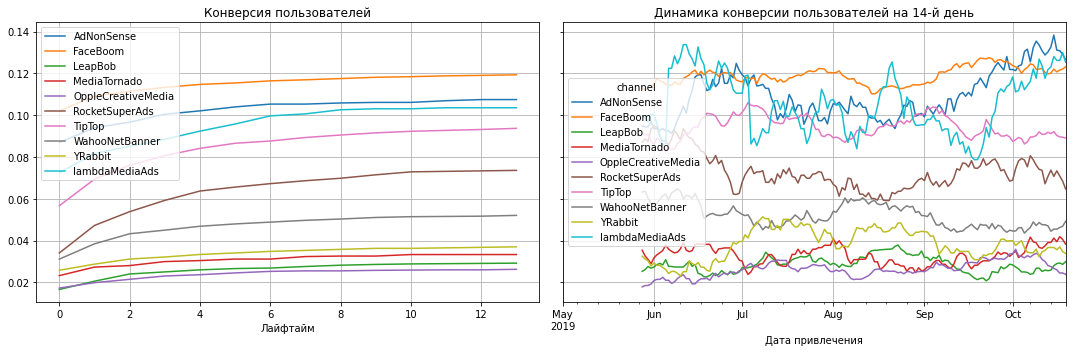

In [49]:
# изучим динамику конверсии в разбивке по разным характеристикам пользователей

for dimension in [['region'], ['device'], ['channel']]:

    conversion_raw, conversion_grouped, conversion_history = get_conversion(
        profiles, orders, observation_date, horizon_days, dimensions=dimension
    )

    plot_conversion(conversion_grouped, conversion_history, horizon_days, window=28)

* Для пользователей США наблюдается сильный рост конверсии к июлю, после чего конверсия оставалась стабильной.
* В разбивке по устройствам, конверсия всех пользователей стабильна, кроме пользователей РС: для них конверсия постепенно снижается весь оставшийся период.
* Динамика конверсии в рзбивке по каналам стабильна. Некоторый разброс только у lamdaMediaAds, что снова объясняется в целом низким количеством пользователей, привлеченных по этому каналу.


*В целом конверсия менялась слабо, для пользователей США она даже заметно улучшилась.* ***Снижение конверсии замечено для пользователей РС.***

### Удержание пользователей

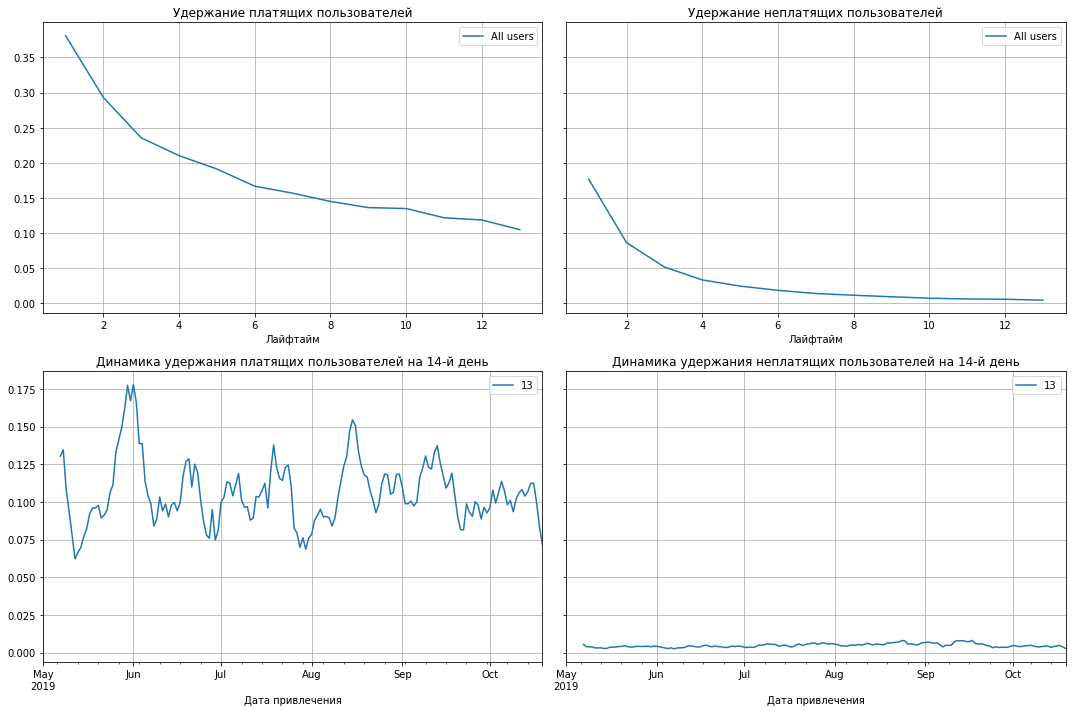

In [50]:
# смотрим общее удержание пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

В среднем заметных изменений в удержании не замечено. Посмотрим удержание в разбивке по разным категориям пользователей.

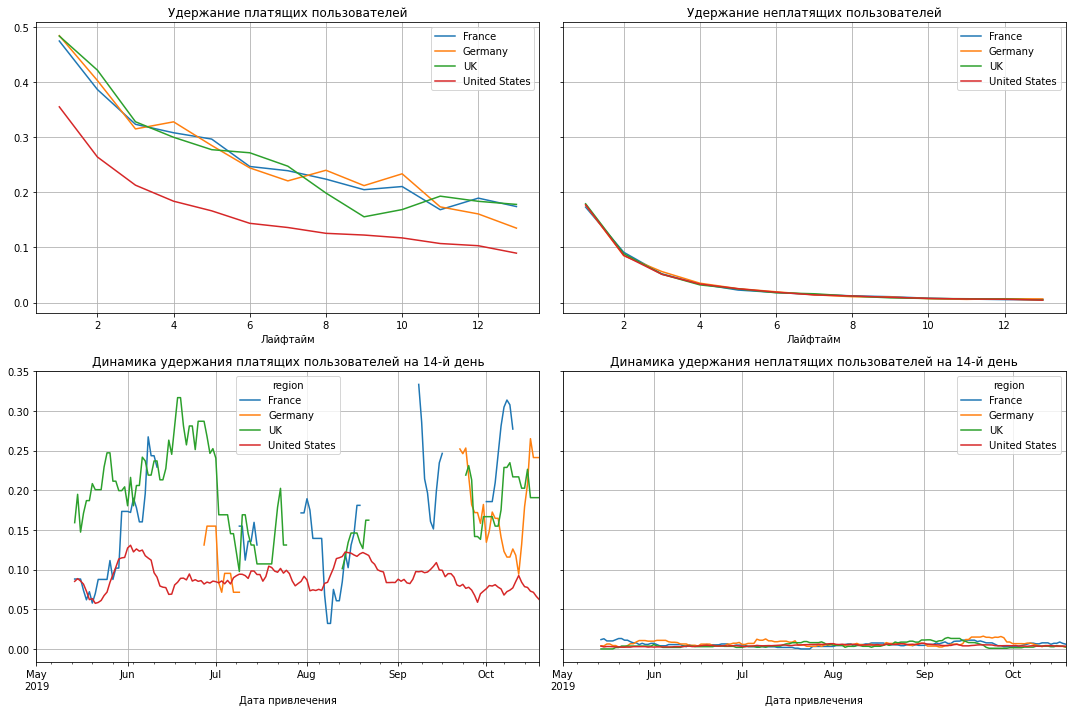

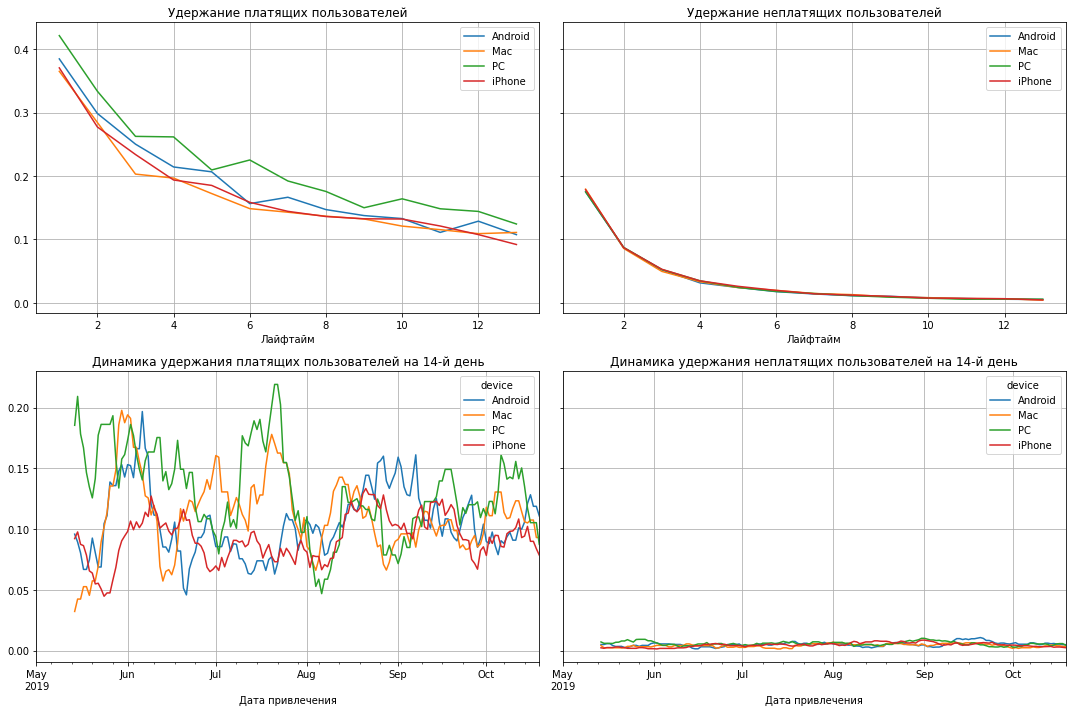

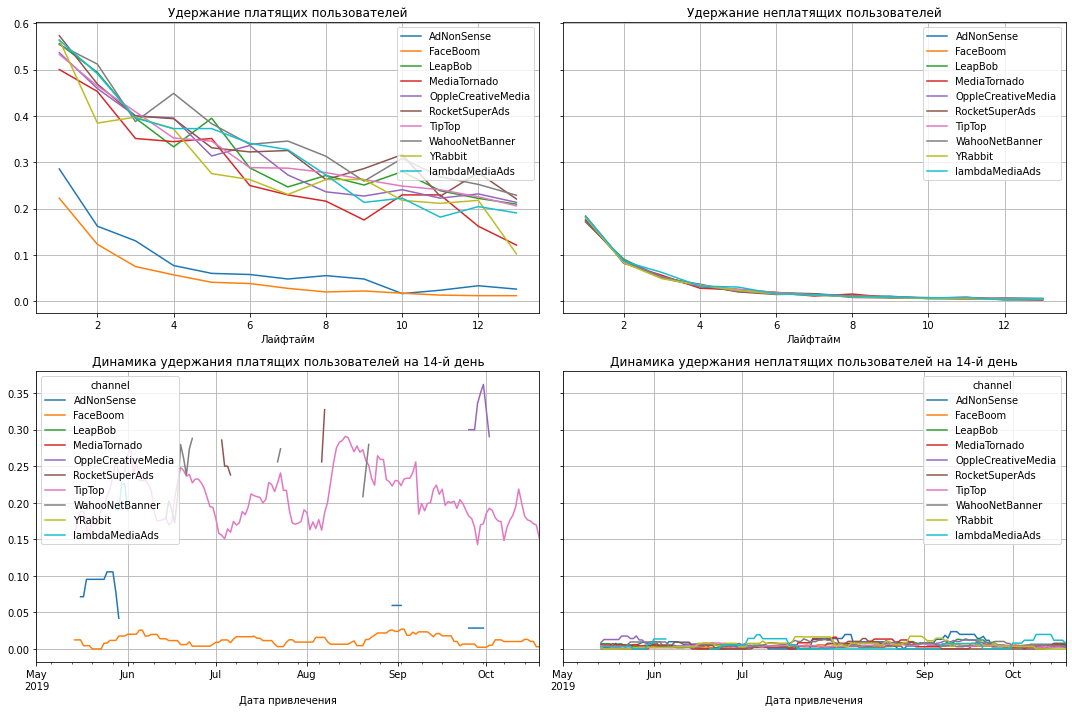

In [51]:
for dimension in [['region'], ['device'], ['channel']]:
    retention_raw, retention_grouped, retention_history = get_retention(
        profiles, visits, observation_date, horizon_days, dimensions=dimension
    )

    plot_retention(retention_grouped, retention_history, horizon_days, window=14)

* Несмотря на то, что пользователи **США обладают самой высокой конверсией, удержание этих пользователей значительно ниже, чем пользователей других устройств**. При этом удержание стабильно низкое в течение всего рассматриваемого периода.
* Внутри разбивки по устройствам каких-либо особенностей нет. Заметно только постепенное медленное снижение удержания пользователей РС со временем.
* **Исключительно слабое удержание у пользователей, привлеченных AdNonSense и FaceBoom**, этим можно объяснить отсутствие окупаемости рекламы по этим двум каналам, несмотря на самую высокую конверсию

### Поиск связей между регионом пользователя и устройством/каналом привлечения

Проверим, являются ли проблемы, выявленные для США, отдельных каналов и устройств взаимосвязанными.

#### Устройство пользователя и регион

region,France,Germany,UK,United States,total_users
device,,,,,
Android,0.15,0.13,0.15,0.57,21841
Mac,0.06,0.05,0.06,0.83,18693
PC,0.23,0.20,0.24,0.34,19153
iPhone,0.06,0.05,0.07,0.81,33882


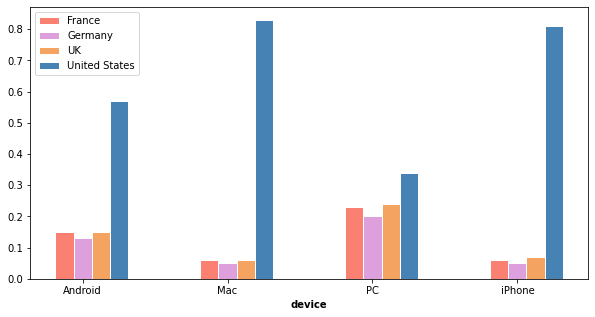

In [52]:
# посмотрим, есть ли связь между
# устройством пользователя и его регионом
connection_to_region(profiles, 'device', group='device')

Распределение по регионам пользователей РС в целом равномерно, для Android есть заметный перекос в сторону США, и более 80% пользователей Apple относятся к региону США. Это подтверждает связанность отсутствия окупаемости для пользователей из США и владельцев устройств Apple.

#### Канал привлечения пользователя и регион

region,France,Germany,UK,United States,total_users
channel,,,,,
AdNonSense,0.35,0.31,0.33,0.0,3880.0
FaceBoom,0.00,0.00,0.00,1.0,29144.0
TipTop,0.00,0.00,0.00,1.0,19561.0
lambdaMediaAds,0.35,0.30,0.35,0.0,2149.0


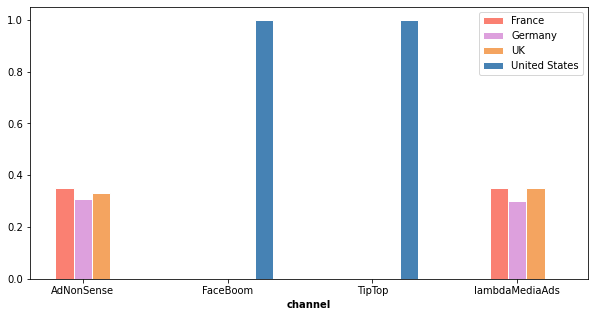

In [53]:
# посмотрим, есть ли связь между
# каналом привлечения пользователя и его регионом
# рассмотрим только 4 интересующих канала

connection_to_region(
    profiles[profiles['channel'].isin(['TipTop', 'FaceBoom', 'AdNonSense', 'lambdaMediaAds'])], 
    'channel',
    'channel'
)

Получаем интересную картину: самые дорогие каналы привлечения работают только с пользователями США. Этим можно объяснить, почему более 60% всех пользователей - из США: больше всего денег уходит на привлечение именно этой категории пользователей.

#### Проверка общих показателей компании без каналов TipTop и FaceBoom

In [54]:
check_profiles = profiles[~(profiles['channel'].isin(['TipTop', 'FaceBoom']))]

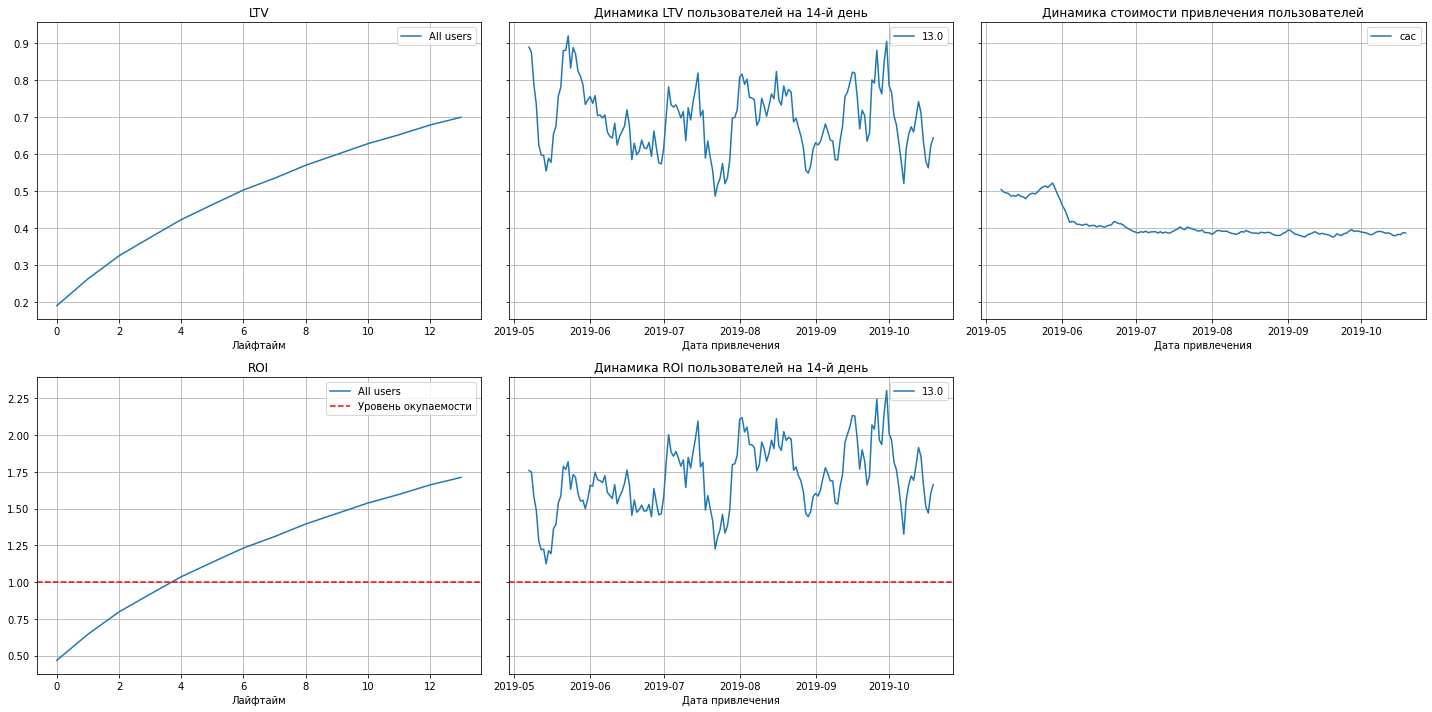

In [55]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    check_profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Если рассматривать пользователей, привлеченных всеми остальными каналами, помимо FaceBoom и TipTop, то картина складывается замечательная:
* качество пользователей стабильно
* реклама окупается ещё в середине первой недели
* стоимость привлечения пользователей снизилась с марта к июлю

### Оценка окупаемости

**Таким образом, в целом рекламные кампании не окупаются.**

В среднем это связано ***с возросшей средней стоимостью привлечения пользователя:*** до изменений кампании окупались на 180%. Существенней всего на это влияют пользователи США: ROI остальных стран больше 150%.

За рассматриваемый период окупаемость равномерно снижается для пользователей всех устройств. Проблемы с пользователями Apple более выражены в силу изначально более высокой стоимости привлечения таких пользователей, в среднем за рассматриваемый период ROI этих пользователей около 60%.

Самыми дорогими пользователями являются те, что привлечены через канал TipTop, при этом стоимость быстро растёт, начиная с июня. Стоимость остальных каналов при этом стабильна с июня. Видимо, причиной общего роста стоимости привлечения пользователя является повышение стоимости привлечения именно через этот канал. Это подтверждается ещё и тем, что этот канал занимает второе место по количеству привлекаемых пользователей: этого количества достаточно для наблюдаемого эффекта.

Общая конверсия пользователей сильно выросла к июню, после чего оставалась стабильной. Причина этому - сильно выросшая конверсия пользователей США. В других регионах конверсия в июне незначительно снизилась. Конверсия пользователей в разбивке по каналам стабильна. 

Большие проблемы есть именно в удержании пользователей. В первую очередь - стабильно низкое удержание пользователей США. Кроме того - крайне низкое удержание пользователей в одном из самых финансируемых каналов: FaceBoom, а также AdNonSense.

## Выводы

**Общие выводы:**

В ходе исследования были изучены данные пользователей, привлеченных с 1 мая по 27 октября 2019 года.

Больше всего пользователей находятся в США, эти пользователи обладают самой высокой конверсией. Наиболее популярное устройство - iPhone, оно же наиболее популярно среди платящих пользователей. Большинство пользователей приходит органическим путём, но их конверсия самая низкая. Больше всего платящих пользователей пришло через канал FaceBoom, конверсия пользователей этого канала самая высокая - 12%.

Больше всего средств за рассматриваемый период ушло на канал TipTop ( >50 000 ), на втором месте - FaceBoom ( ~30 000 ). Затраты на канал TipTop резко выросли в июне и продолжили медленный рост в течение всего рассматриваемого периода. Этот же канал характеризуется самой высокой стоимостью привлечения пользователя - 2,8, в то время как конверсия не самая высокая: 9,6%.

**Реклама не окупается.**

***Причины:***
* Резко **возросла средняя стоимость привлечения пользователя**. Повышение средней стоимости привлечения в первую очередь связано с сильным повышением средств, выделяемых на рекламные кампании каналов **TipTop** и **FaceBoom**.
* **Стабильно низкое удержание пользователей США**, в то время как основная часть пользователей относятся именно к этому региону.
* Крайне низкое удержание пользователей в одном из самых финансируемых каналов: **FaceBoom**.

**Рекомендации:**
1. **Снизить количество средств, выделяемых на кампании через канал TipTop.** *До июня рекламные кампании этого канала окупались, конверсия и удержание пользователей через этот канал высокие, поэтому, вероятно, при выполнении рекомендации этот канал перестанет приносить убытки.*
2. **Выяснить причины плохого удержания пользователей США:** нет ли каких-либо проблем с локализацией приложения, нет ли ошибок оформления/оплаты заказов.
3. **Пересмотреть работу с каналом FaceBoom.** *Несмотря на самую высокую конверсию, удержание пользователей, привлеченных этими каналами стабильно крайне низкое. Возможно, плохое удержание пользователей, привлеченных каналом FaceBoom, решится автоматически после рассмотрения пункта 2: большинство пользователей из США и привлечены каналом FaceBoom, поэтому плохое удержание внутри этих категорий сильно взаимосвязано.*
4. **Пересмотреть работу с каналом AdNonSense.** *Этот канал работает с пользователями Европы. Несмотря на то, что основные проблемы связаны с пользователями США, пользователи, привлеченные этим каналом, едва начали окупаться в период с августа по октябрь.*
5. **Обратить внимание на удержание пользователей РС.** *Конверсия и удержание пользователей в течение рассматриваемого периода медленно падает. На данный момент это мало сказывается на эффективности привлечения пользователей, однако при продолжении тенденции можно прийти к убыткам по этому каналу.*
6. **Обратить внимание на канал lambdaMediaAds.** *Пользователи этого канала обладают высокой конверсией, а рекламная кампания окупается в среднем уже на второй день. Возможно, кампании через этот канал - это потенциальная точка роста.*